In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from pulser.devices import Chadoq2
from pulser import Pulse, Sequence, Register

from src.mapping import create_coordinates
from src.qubo_tools import build_qubo_matrix, brute_force
from src.quantum_solver_qaoa import QAOA_solver_for_max_cut, plot_solution

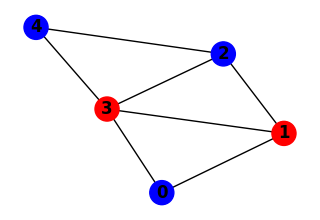

In [2]:
Graph_Example_encoding  = nx.Graph()
Graph_Example_encoding .add_edges_from([[0,1],[1,2], [1,3], [0,3],[3,2],[3,4],[2,4]])

plt.figure(figsize=(3,2)) 
nx.draw(Graph_Example_encoding ,with_labels=True,node_color = ['b','r','b','r','b'],font_weight='bold')

In [3]:
Q_example_encoding = build_qubo_matrix(Graph_Example_encoding)
coords_example = create_coordinates(Q_example_encoding)

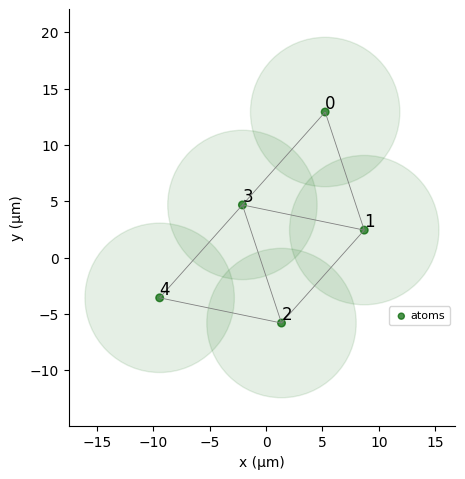

In [4]:
qubits_example = dict(enumerate(coords_example))
reg_example = Register(qubits_example)
reg_example.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1.0),
    draw_graph=True,
    draw_half_radius=True,
)

In [5]:
opt_parameters = QAOA_solver_for_max_cut(Q_example_encoding,
                                       reg_example, 
                                       p_layers = 4)

capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


Best solution: 01001 with 5.0 cuts


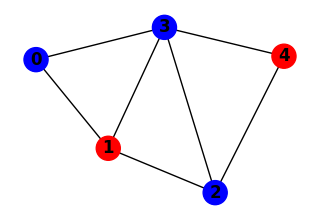

In [6]:
plot_solution(Graph_Example_encoding , 
              Q_example_encoding,
              opt_parameters,
              reg_example,
              p_layers = 4)

In [11]:
brute_force(Q_example_encoding)[:4]

[('00110', -5.0), ('01001', -5.0), ('01010', -5.0), ('01011', -5.0)]